In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns

# IMPORTING DATASET

In [7]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

# select dataset

In [8]:
dataset=sns.load_dataset('diamonds')

In [9]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# slicing dataset

In [14]:
data=dataset.drop(['cut','color','clarity','depth','table','x','y','z'],axis=1)

In [15]:
data

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


# dataset shape

In [16]:
dataset.shape

(53940, 10)

# dataset head

In [17]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# dataset tail

In [18]:
dataset.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


# reshape dataset into dataframe

In [19]:
x=data.iloc[:,-1].values.reshape(-1,1)

In [20]:
y=data.iloc[:,0].values.reshape(-1,1)

In [21]:
x

array([[ 326],
       [ 326],
       [ 327],
       ...,
       [2757],
       [2757],
       [2757]], dtype=int64)

In [22]:
y

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]])

# importing library trainning set and text

In [23]:
from sklearn.model_selection import train_test_split

# splitting data

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_train.shape

(43152, 1)

In [26]:
x_test.shape

(10788, 1)

In [27]:
y_train.shape

(43152, 1)

In [28]:
y_test.shape

(10788, 1)

In [29]:
from sklearn.linear_model import LinearRegression

# applying linear regression

In [30]:
lm=LinearRegression()

# fitting the values of regression

In [31]:
lm.fit(x_train,y_train)

LinearRegression()

# prediction of linear regression

In [32]:
y_pred=lm.predict(x_test)

In [33]:
y_pred

array([[0.88577842],
       [1.07108791],
       [0.97092655],
       ...,
       [0.78868546],
       [1.26220545],
       [0.57718497]])

# checking dataframes

In [38]:
check=pd.DataFrame(x_test,columns=['diamonds'])
check['carat']=y_test
check['price']=y_pred

In [39]:
check

,diamonds,carat,price
0,4733,1.10,0.885778
1,6424,1.29,1.071088
2,5510,1.20,0.970927
3,8770,1.50,1.328176
4,4493,0.90,0.859478
...,...,...,...
10783,1289,0.52,0.508365
10784,3435,0.91,0.743536
10785,3847,1.08,0.788685
10786,8168,1.02,1.262205


# regression visualisation

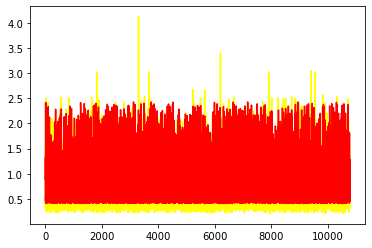

In [42]:
plt.plot(y_test,color='yellow')
plt.plot(y_pred,color='red')
plt.show()

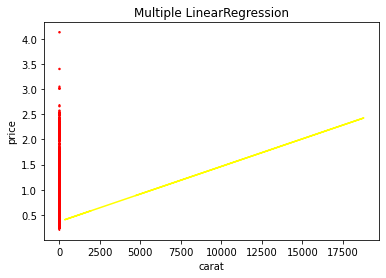

In [44]:
plt.scatter(y_test,y_test,y_pred,color='red')
plt.plot(x_test,y_pred,color='yellow')
plt.title('Multiple LinearRegression')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

# performing metrics

# importing libraries

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# MEAN SQUARED ERROR

In [47]:
mean_squared_error(y_test,y_pred)

0.03291100967224181

# applying mean squared error

In [51]:
mean_squared_error(y_test,y_pred)

0.03291100967224181

# mean absolute error

In [52]:
mean_absolute_error(y_test,y_pred)


0.1335910070072486

# r squared score

In [53]:
r2_score(y_test,y_pred)

0.8516065939452341

# statistics
# measure of the central tendency

In [55]:
dataset.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [56]:
dataset.median()

carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

In [57]:
dataset.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,62.0,56.0,605,4.37,4.34,2.7


# measure of spread
# range

In [58]:
max(dataset['price'])-min(dataset['price'])

18497

# quantile

In [59]:
data_quant=[dataset['price'].quantile(0),
            dataset['price'].quantile(0.25),
            dataset['price'].quantile(0.50),
            dataset['price'].quantile(0.90),
            dataset['price'].quantile(1)]

In [60]:
data_quant

[326.0, 950.0, 2401.0, 9821.0, 18823.0]

# inter quantile range

In [64]:
dataset['price'].quantile(0)-dataset['price'].quantile(0.25)

-624.0

# STANDARD DEVIATION

In [65]:
dataset['price'].std()

3989.4397381463023

In [66]:
dataset['price'].var

<bound method NDFrame._add_numeric_operations.<locals>.var of 0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64>

# mean absolute deviation

In [67]:
abs_median=abs(dataset['price']-dataset['price'].median())

In [69]:
abs_median

0        2075.0
1        2075.0
2        2074.0
3        2067.0
4        2066.0
          ...  
53935     356.0
53936     356.0
53937     356.0
53938     356.0
53939     356.0
Name: price, Length: 53940, dtype: float64

In [70]:
med=abs_median.median()*10.356

In [71]:
med

17294.52

# skewness

In [74]:
dataset['price'].skew()

1.618395283383529

# kertosis

In [75]:
dataset['price'].kurt()

2.17769575924869

# creating data 

In [5]:
data=["cut","color","clarity","depth","price"]
percentage=[25,35,30,70,50]


# scatter plot

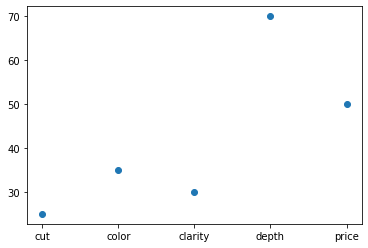

In [6]:
plt.scatter(data,percentage)

# line plot

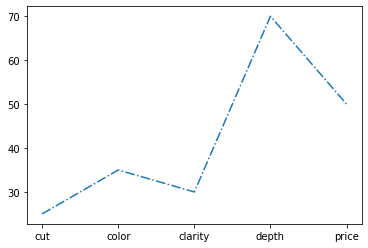

In [9]:
plt.plot(data,percentage,linestyle='dashdot')

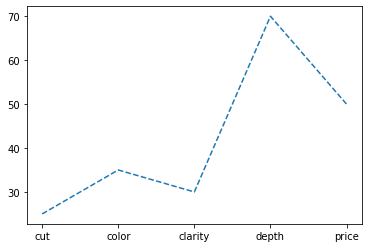

In [10]:
plt.plot(data,percentage,linestyle='dashed')

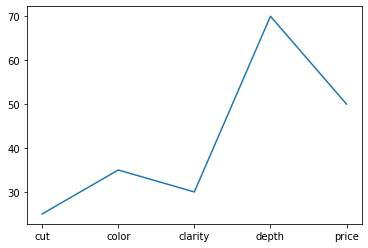

In [11]:
plt.plot(data,percentage,linestyle='solid')

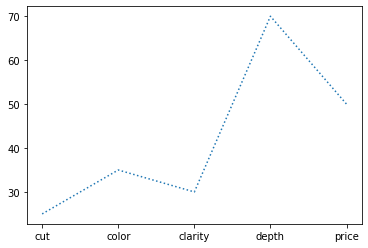

In [12]:
plt.plot(data,percentage,linestyle='dotted')

# pie chart

([<matplotlib.patches.Wedge at 0x1e4668993d0>,
 [Text(1.023961123060693, 0.40187512794434593, 'cut'),
  Text(0.3242306731064896, 1.0511300921469773, 'color'),
  Text(-0.6858388280562522, 0.8600145940217683, 'clarity'),
  Text(-0.9088625868249082, -0.6196521590940651, 'depth'),
  Text(0.806357162420836, -0.7481899001006479, 'price')])

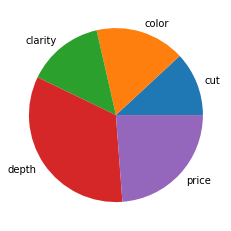

In [13]:
plt.pie(percentage,labels=data)

# bar plot

<BarContainer object of 5 artists>

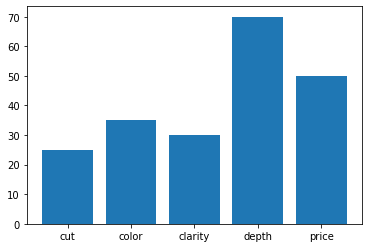

In [14]:
plt.bar(data,percentage)

In [10]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# save file

In [11]:
dataset.to_csv("dataset.csv")